# CALFEWS: California Food-Energy-Water System simulation model
Intro to model, direct to future paper location
## Software setup
* Instructions for downloading from GitHub
* Requires Python 3 (I use Python 3.6.9)  

### Create virtual environment

In [1]:
#! python3 -m venv .venv_calfews
#! source .venv_calfews/bin/activate

### Download Python modules (pip)

In [2]:
# ! pip3 install -r requirements.txt
# ! ipython3 kernel install --user --name=jupyter_calfews

### Download Python modules (conda)

In [3]:
#! conda install --file requirements.txt

### Check dependencies met

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cord
from cord import *
from datetime import datetime
import os
import shutil
import sys
from configobj import ConfigObj
import json
import h5py
from distutils.util import strtobool
import warnings
warnings.filterwarnings('ignore')

## Model setup
### Parameter file: `cord/data/input/runtime_params.ini`
Intro to file, how to use it

In [5]:
#! cat cord/data/input/runtime_params.ini

In [6]:
startTime = datetime.now()

# get runtime params from config file
config = ConfigObj('cord/data/input/runtime_params.ini')
parallel_mode = bool(strtobool(config['parallel_mode']))
parallel_mode, type(parallel_mode)

(False, bool)

In [7]:
model_mode = config['model_mode']
model_mode, type(model_mode)

('validation', str)

In [8]:
short_test = int(config['short_test'])
short_test, type(short_test)

(-1, int)

In [9]:
print_log = bool(strtobool(config['print_log']))
print_log, type(print_log)

(False, bool)

In [10]:
seed = int(config['seed'])
seed, type(seed)

(1001, int)

In [11]:
scenario_name = config['scenario_name'] #scenarios provide information on infrastructural plans
scenario_name, type(scenario_name)

('baseline_wy2017', str)

In [12]:
flow_input_type = config['flow_input_type']
flow_input_type, type(flow_input_type)

('observations', str)

In [13]:
flow_input_source = config['flow_input_source']
flow_input_source, type(flow_input_source)

('CDEC', str)

In [14]:
total_sensitivity_factors = int(config['total_sensitivity_factors'])
total_sensitivity_factors, type(total_sensitivity_factors)

(1, int)

In [15]:
sensitivity_sample_file = config['sensitivity_sample_file']
sensitivity_sample_file, type(sensitivity_sample_file)

('cord/data/input/SALib-sample.txt', str)

In [16]:
output_list = config['output_list']
output_list, type(output_list)

('cord/data/input/output_list.json', str)

In [17]:
output_directory = config['output_directory']
output_directory, type(output_directory)

('cord/data/results', str)

In [18]:
clean_output = bool(strtobool(config['clean_output']))
clean_output, type(clean_output)

(True, bool)

In [19]:
save_full = bool(strtobool(config['save_full']))
save_full, type(save_full)

(True, bool)

### Inflow source parameter file: `cord/data/input/base_inflows.json`
Intro to file, how to use it

In [20]:
#! cat cord/data/input/base_inflows.json

### Infrastructure scenario file: e.g., `cord/scenarios/scenarios_main.json`
Intro to file, how to use it

In [21]:
#! cat cord/scenarios/scenarios_main.json

In [22]:
#! cat cord/scenarios/FKC_properties__capacity_wy2017.json

### Data output parameter file: `cord/data/input/output_list.json`
Intro to file, how to use it

In [23]:
#! cat cord/data/input/output_list.json

## Run simulation

In [24]:
! python3 -W ignore main.py

0
1
validation
#######################################################
Sample 0 start
Year  1.0 ,  0:03:01.540906
SMI 1738.0728328155117 0.0 0.0
FRS 1738.0728328155117 5.795987195392286 140.25
TLB 1738.0728328155117 0.0 0.0
CNS 1738.0728328155117 64.17267058486567 80.75
ALT 1738.0728328155117 0.00041609298511957604 55.25
KRWA 1738.0728328155117 0.003414343792883301 148.75
KWD 1738.0728328155117 0.0 0.0
Year  2.0 ,  0:04:02.791128
SMI 1979.7531813424453 0.0 0.0
FRS 1979.7531813424453 150.45353117002196 140.25
TLB 1979.7531813424453 0.0 0.0
CNS 1979.7531813424453 209.9323741877755 80.75
ALT 1979.7531813424453 54.79641823603512 55.25
KRWA 1979.7531813424453 3.5337253822783623 148.75
KWD 1979.7531813424453 0.0 0.0
^C
Traceback (most recent call last):
  File "main.py", line 358, in <module>
    swp_release, cvp_release, swp_release2, cvp_release2, swp_pump, cvp_pump = modelso.simulate_south(t, swp_pumping, cvp_pumping, swp_alloc, cvp_alloc, proj_surplus, max_pumping, swp_forgo, cvp_forgo, 

## Analyze data

### Get data from HDF5 output

In [25]:
f = output_directory + '/' + scenario_name + '/' + 'p0/results_p0.hdf5'

def get_results_sensitivity_number(results_file, sensitivity_number):
  with h5py.File(results_file, 'r') as f:
    data = f['s' + str(sensitivity_number)]
    names = data.attrs['columns']
    names = list(map(lambda x: str(x).split("'")[1], names))
    df_data = pd.DataFrame(data[:], columns=names)
    return df_data 

df = get_results_sensitivity_number(f, 0)

In [26]:
df.head()

,shasta_S,shasta_R,shasta_R_to_delta,shasta_available_storage,shasta_Q,shasta_SNPK,shasta_downstream,shasta_fnf,oroville_S,oroville_R,...,b2800_BLR,b2800_BVA,b2800_CWO,b2800_KCWA,b2800_KND,b2800_LHL,b2800_WRM,wkwb_WKN,northkernwb_NKN,northkernwb_CWO
0,3090.000000,7.524298,7.490782,0.000000,9.668217,0.000000,6.110359,0.016008,2740.000000,12.218333,...,0.0,0.496303,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,3092.081101,12.756535,12.726962,321.316346,9.133803,0.000000,2.455806,0.011496,2733.778036,5.531127,...,0.0,1.072299,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,3088.324879,13.673933,13.646332,709.693715,8.819786,0.000000,2.767241,0.003981,2731.294507,7.353451,...,0.0,1.617006,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,3083.345093,13.486933,13.457360,1145.756637,10.479591,0.000000,3.720770,0.003513,2731.068403,5.512634,...,0.0,2.161709,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,3080.194446,11.769865,11.722549,1118.038990,6.756245,0.086196,2.198199,0.010363,2730.667558,10.568933,...,0.0,2.716404,0.0,0.0,0.0,0.0,0.0,0.0,0.050041,0.0


In [27]:
# set(df.columns)

### Visualize data

Text(0.5, 1.0, 'Shasta inflow (TAF/day), 1996-2016')

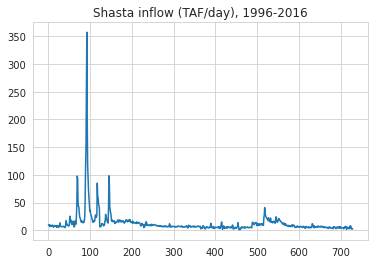

In [28]:
plt.plot(df.shasta_Q)
plt.title('Shasta inflow (TAF/day), 1996-2016')

Text(0.5, 1.0, 'Shasta release (TAF/day), 1996-2016')

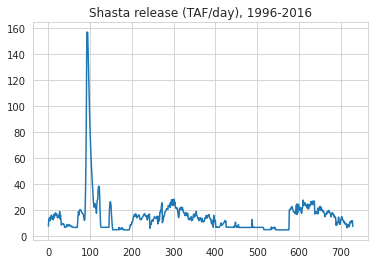

In [29]:
plt.plot(df.shasta_R)
plt.title('Shasta release (TAF/day), 1996-2016')

Text(0.5, 1.0, 'Shasta storage (TAF), 1996-2016')

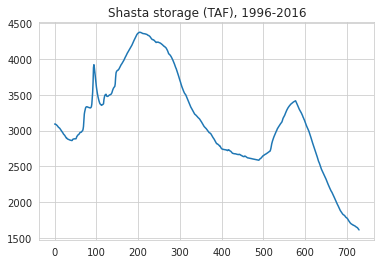

In [30]:
plt.plot(df.shasta_S)
plt.title('Shasta storage (TAF), 1996-2016')

Text(0.5, 1.0, 'Delta pumping (TAF/day), 1996-2016')

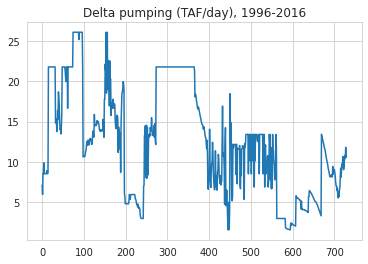

In [31]:
plt.plot(df.delta_HRO_pump + df.delta_TRP_pump)
plt.title('Delta pumping (TAF/day), 1996-2016')

Text(0.5, 1.0, 'Lost Hills Table A delivery (TAF/day), 1996-2016')

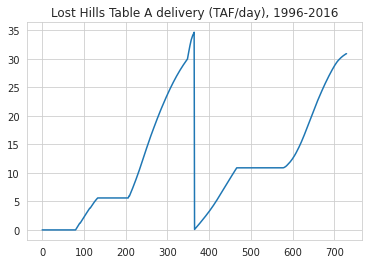

In [32]:
plt.plot(df.losthills_tableA_delivery)
plt.title('Lost Hills Table A delivery (TAF/day), 1996-2016')

Text(0.5, 1.0, 'Wonderful banked groundwater at Semitropic (TAF), 1996-2016')

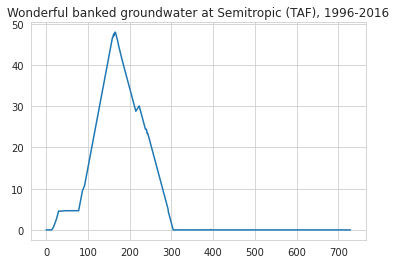

In [33]:
plt.plot(df.kwb_WON)
plt.title('Wonderful banked groundwater at Semitropic (TAF), 1996-2016')